UBER Businness analysis

In [12]:
# BLOC : IMPORTATIONS
import pandas as pd # to do dataframes
import numpy as np # to do calculations
import yfinance as yf # for financial informations
import matplotlib.pyplot as plt # plots ... ggplot2
import seaborn as sns # visualisations

# More and more NLP is used
from wordcloud import WordCloud # just to take a subset of the library
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Printing the context / statement
print("Corporate Strategy")
print("Overview of UBER")  

Corporate Strategy
Overview of UBER


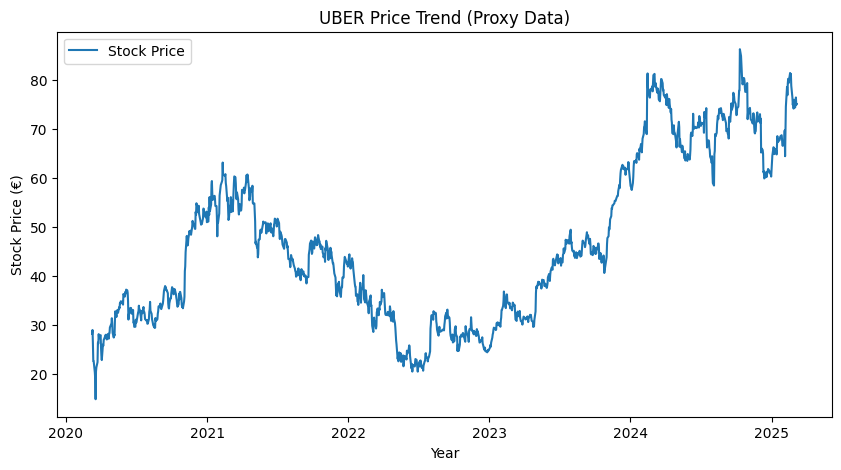

In [14]:
# Financial analysis
try:
  UBER_stock = yf.Ticker("UBER")
  UBER_hist = UBER_stock.history(period="5y")
  if UBER_hist.empty:
    raise ValueError("Data empty")

except :
  print("Using sample data as UBER stock data may not be public.")
  dates = pd.date_range(start="2019-01-01", periods=60, freq='M')
  prices = np.linspace(50,300,60) + np.random.normal(0,20,60)
  UBER_hist = pd.DataFrame({"Date": dates, "Close":prices}).set_index("Date")

# Plot stock trends
plt.figure(figsize=(10,5))
sns.lineplot(data=UBER_hist, x=UBER_hist.index, y="Close", label="Stock Price")
plt.title("UBER Price Trend (Proxy Data)")
plt.xlabel("Year")
plt.ylabel("Stock Price (€)")
plt.legend()
plt.show()

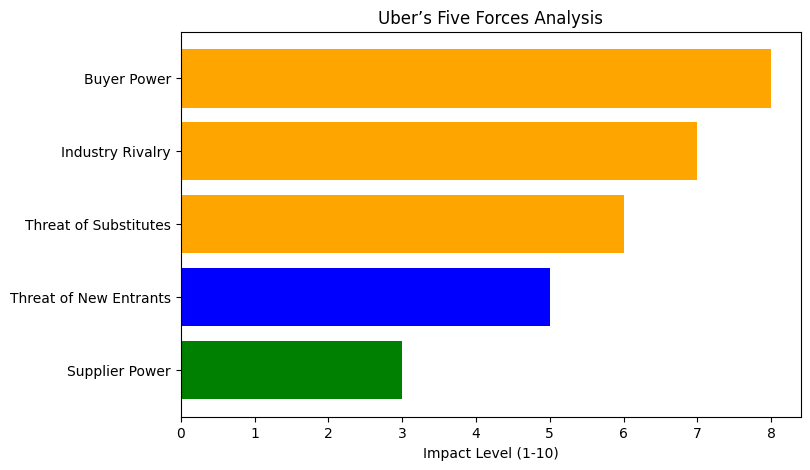

In [15]:
import matplotlib.pyplot as plt

# Données des forces concurrentielles pour Uber
forces_uber = {
    "Supplier Power": 3,
    "Buyer Power": 8,
    "Industry Rivalry": 7,
    "Threat of Substitutes": 6,
    "Threat of New Entrants": 5
}

# Trier les forces par valeur décroissante
sorted_forces_uber = dict(sorted(forces_uber.items(), key=lambda item: item[1], reverse=True))

# Définir les couleurs en fonction des valeurs
colors = ["green" if value < 5 else "blue" if value == 5 else "orange" for value in sorted_forces_uber.values()]

# Création du graphique en barres horizontales
plt.figure(figsize=(8, 5))
bars = plt.barh(list(sorted_forces_uber.keys()), list(sorted_forces_uber.values()), color=colors)

# Ajout des labels et du titre
plt.xlabel("Impact Level (1-10)")
plt.title("Uber’s Five Forces Analysis")
plt.gca().invert_yaxis()  # Inverser l'ordre des valeurs pour que le plus grand soit en haut

# Affichage du graphique
plt.show()


In [17]:
years = list(range(2024, 2031))
scenarios = {"Pessimistic": 0.04, "Neutral": 0.07, "Optimistic": 0.12}
initial_revenue = 32000 
cogs_ratio = 0.55
operating_expenses_growth = 0.05
depreciation_growth = 0.03
interest_expense = 800
tax_rate = 0.21 
initial_operating_expenses = 7000  
initial_depreciation = 2500 

In [18]:
data = {"Year": years}
for scenario, growth_rate in scenarios.items():
    revenue = [initial_revenue * (1 + growth_rate) ** (year - 2024) for year in years]
    cogs = [r * cogs_ratio for r in revenue]
    gross_profit = [r - c for r, c in zip(revenue, cogs)]
    operating_expenses = [initial_operating_expenses * (1 + operating_expenses_growth) ** (year - 2024) for year in years]
    ebitda = [gp - op for gp, op in zip(gross_profit, operating_expenses)]
    depreciation = [initial_depreciation * (1 + depreciation_growth) ** (year - 2024) for year in years]
    ebit = [e - d for e, d in zip(ebitda, depreciation)]
    ebt = [e - interest_expense for e in ebit]
    tax = [e * tax_rate for e in ebt]
    net_income = [e - t for e, t in zip(ebt, tax)]
    roi = [ni / r for ni, r in zip(net_income, revenue)]

In [19]:
data[f"COGS ({scenario}) (€M)"] = cogs
data[f"Gross Profit ({scenario}) (€M)"] = gross_profit
data[f"Operating Expenses ({scenario}) (€M)"] = operating_expenses
data[f"EBITDA ({scenario}) (€M)"] = ebitda
data[f"Depreciation ({scenario}) (€M)"] = depreciation
data[f"EBIT ({scenario}) (€M)"] = ebit
data[f"EBT ({scenario}) (€M)"] = ebt
data[f"Tax ({scenario}) (€M)"] = tax
data[f"Net Income ({scenario}) (€M)"] = net_income
data[f"ROI ({scenario})"] = roi

In [20]:
df = pd.DataFrame(data)
print(df)

   Year  COGS (Optimistic) (€M)  Gross Profit (Optimistic) (€M)  \
0  2024            17600.000000                    14400.000000   
1  2025            19712.000000                    16128.000000   
2  2026            22077.440000                    18063.360000   
3  2027            24726.732800                    20230.963200   
4  2028            27693.940736                    22658.678784   
5  2029            31017.213624                    25377.720238   
6  2030            34739.279259                    28423.046667   

   Operating Expenses (Optimistic) (€M)  EBITDA (Optimistic) (€M)  \
0                           7000.000000               7400.000000   
1                           7350.000000               8778.000000   
2                           7717.500000              10345.860000   
3                           8103.375000              12127.588200   
4                           8508.543750              14150.135034   
5                           8933.970938          

In [21]:
df

,Year,COGS (Optimistic) (€M),Gross Profit (Optimistic) (€M),Operating Expenses (Optimistic) (€M),EBITDA (Optimistic) (€M),Depreciation (Optimistic) (€M),EBIT (Optimistic) (€M),EBT (Optimistic) (€M),Tax (Optimistic) (€M),Net Income (Optimistic) (€M),ROI (Optimistic)
0,2024,17600.000000,14400.000000,7000.000000,7400.000000,2500.000000,4900.000000,4100.000000,861.000000,3239.000000,0.101219
1,2025,19712.000000,16128.000000,7350.000000,8778.000000,2575.000000,6203.000000,5403.000000,1134.630000,4268.370000,0.119095
2,2026,22077.440000,18063.360000,7717.500000,10345.860000,2652.250000,7693.610000,6893.610000,1447.658100,5445.951900,0.135671
3,2027,24726.732800,20230.963200,8103.375000,12127.588200,2731.817500,9395.770700,8595.770700,1805.111847,6790.658853,0.151046
4,2028,27693.940736,22658.678784,8508.543750,14150.135034,2813.772025,11336.363009,10536.363009,2212.636232,8323.726777,0.165309
5,2029,31017.213624,25377.720238,8933.970938,16443.749301,2898.185186,13545.564115,12745.564115,2676.568464,10068.995651,0.178544
6,2030,34739.279259,28423.046667,9380.669484,19042.377182,2985.130741,16057.246441,15257.246441,3204.021753,12053.224688,0.190829


In [22]:
df.describe()

,Year,COGS (Optimistic) (€M),Gross Profit (Optimistic) (€M),Operating Expenses (Optimistic) (€M),EBITDA (Optimistic) (€M),Depreciation (Optimistic) (€M),EBIT (Optimistic) (€M),EBT (Optimistic) (€M),Tax (Optimistic) (€M),Net Income (Optimistic) (€M),ROI (Optimistic)
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2027.000000,25366.658060,20754.538413,8142.008453,12612.529960,2736.593636,9875.936324,9075.936324,1905.946628,7169.989696,0.148816
std,2.160247,6174.080849,5051.520694,857.223670,4195.880045,174.673380,4021.838712,4021.838712,844.586129,3177.252582,0.032268
min,2024.000000,17600.000000,14400.000000,7000.000000,7400.000000,2500.000000,4900.000000,4100.000000,861.000000,3239.000000,0.101219
25%,2025.500000,20894.720000,17095.680000,7533.750000,9561.930000,2613.625000,6948.305000,6148.305000,1291.144050,4857.160950,0.127383
50%,2027.000000,24726.732800,20230.963200,8103.375000,12127.588200,2731.817500,9395.770700,8595.770700,1805.111847,6790.658853,0.151046
75%,2028.500000,29355.577180,24018.199511,8721.257344,15296.942167,2855.978605,12440.963562,11640.963562,2444.602348,9196.361214,0.171927
max,2030.000000,34739.279259,28423.046667,9380.669484,19042.377182,2985.130741,16057.246441,15257.246441,3204.021753,12053.224688,0.190829


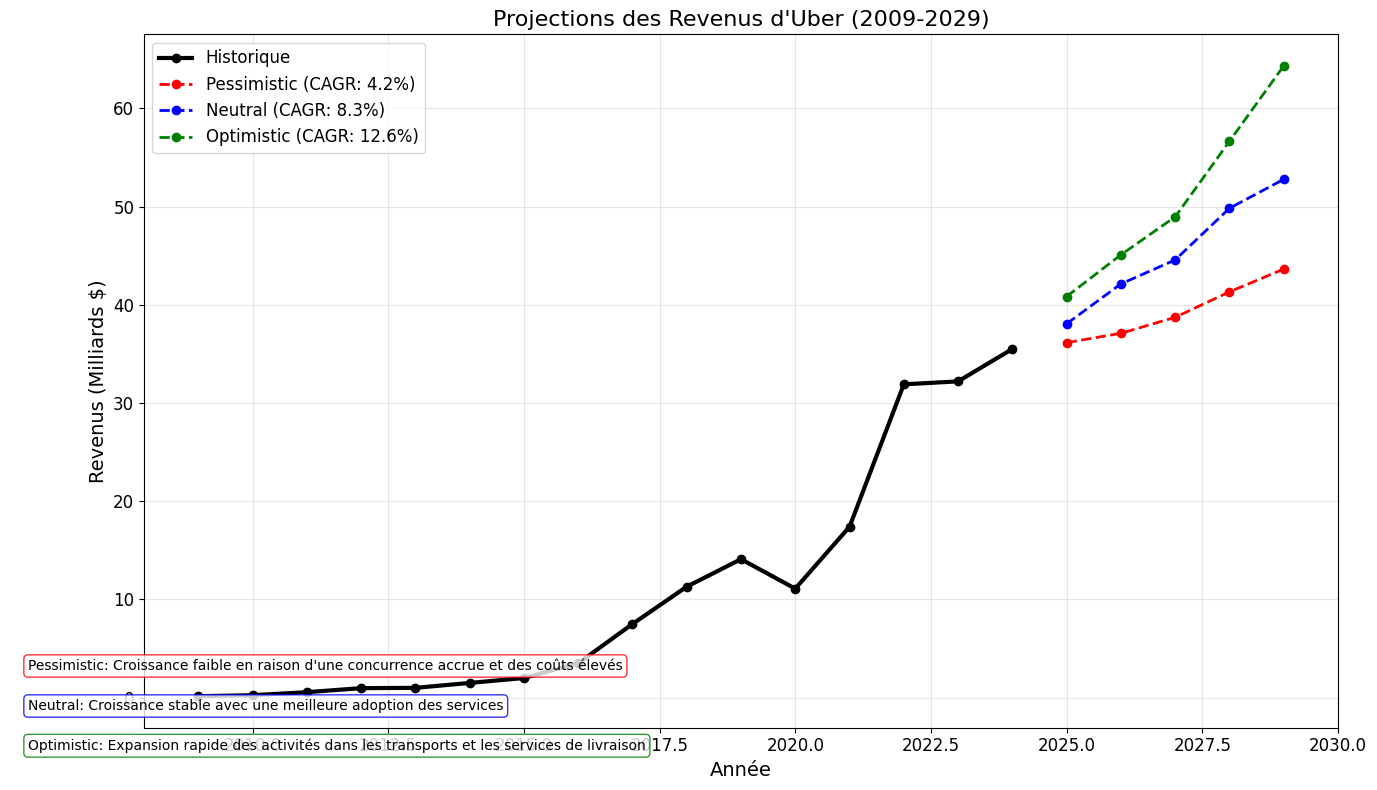

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Données historiques des revenus d'Uber en milliards de dollars
historical_revenue = {
    2009: 0.15, 2010: 0.25, 2011: 0.56, 2012: 0.97, 2013: 1.0, 2014: 1.5, 2015: 2.0,
    2016: 3.5, 2017: 7.5, 2018: 11.3, 2019: 14.1, 2020: 11.1, 2021: 17.4,
    2022: 31.9, 2023: 32.2, 2024: 35.5
}

# Convertir en DataFrame
df_historical = pd.DataFrame(list(historical_revenue.items()), columns=['Year', 'Revenue'])
df_historical['Revenue_Type'] = 'Historical'

# Fonction pour générer des projections de revenus pour Uber
def generate_projections(years_to_project=5):
    current_year = 2024
    projection_years = range(current_year + 1, current_year + years_to_project + 1)

    # Scénarios de croissance
    scenarios = {
        'Pessimistic': {
            'growth_rate': np.linspace(0.04, 0.06, years_to_project),  # 4-6% growth
            'volatility': 0.015,  # Faible volatilité
            'description': 'Croissance faible en raison d\'une concurrence accrue et des coûts élevés'
        },
        'Neutral': {
            'growth_rate': np.linspace(0.07, 0.09, years_to_project),  # 7-9% growth
            'volatility': 0.02,  # Volatilité modérée
            'description': 'Croissance stable avec une meilleure adoption des services'
        },
        'Optimistic': {
            'growth_rate': np.linspace(0.12, 0.15, years_to_project),  # 12-15% growth
            'volatility': 0.03,  # Volatilité plus élevée
            'description': 'Expansion rapide des activités dans les transports et les services de livraison'
        }
    }

    # Dernière valeur historique
    latest_revenue = historical_revenue[current_year]

    # Dictionnaire pour stocker les projections
    projections = {}

    # Générer les projections
    for scenario, params in scenarios.items():
        revenues = [latest_revenue]

        for i, year in enumerate(projection_years):
            growth_factor = 1 + params['growth_rate'][i] + np.random.normal(0, params['volatility'])
            new_revenue = revenues[-1] * growth_factor
            revenues.append(new_revenue)

        projections[scenario] = dict(zip(projection_years, revenues[1:]))

    return projections, scenarios

# Générer les projections
projections, scenarios_info = generate_projections()

# Convertir les projections en DataFrame
projection_data = []
for scenario, data in projections.items():
    for year, revenue in data.items():
        projection_data.append([year, revenue, scenario])

df_projections = pd.DataFrame(projection_data, columns=['Year', 'Revenue', 'Revenue_Type'])

# Fusionner les données historiques et les projections
df_combined = pd.concat([df_historical, df_projections])

# Calculer le taux de croissance annuel moyen (CAGR) pour chaque scénario
def calculate_cagr(start_value, end_value, years):
    return (end_value / start_value) ** (1 / years) - 1

cagr_data = {}
for scenario in ['Pessimistic', 'Neutral', 'Optimistic']:
    scenario_data = df_projections[df_projections['Revenue_Type'] == scenario]
    start_year = min(scenario_data['Year'])
    end_year = max(scenario_data['Year'])
    start_value = historical_revenue[2024]
    end_value = scenario_data[scenario_data['Year'] == end_year]['Revenue'].values[0]
    years = end_year - 2024

    cagr = calculate_cagr(start_value, end_value, years)
    cagr_data[scenario] = cagr

# Tracer les projections
plt.figure(figsize=(14, 8))

# Données historiques
historical_years = df_historical['Year']
historical_revenue_values = df_historical['Revenue']
plt.plot(historical_years, historical_revenue_values, 'o-', linewidth=3, color='black', label='Historique')

# Projections par scénario
colors = {'Pessimistic': 'red', 'Neutral': 'blue', 'Optimistic': 'green'}
for scenario in ['Pessimistic', 'Neutral', 'Optimistic']:
    scenario_data = df_projections[df_projections['Revenue_Type'] == scenario]
    plt.plot(scenario_data['Year'], scenario_data['Revenue'], 'o--', linewidth=2,
             color=colors[scenario], label=f"{scenario} (CAGR: {cagr_data[scenario]:.1%})")

plt.title('Projections des Revenus d\'Uber (2009-2029)', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Revenus (Milliards $)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajouter une annotation des scénarios
y_pos = max(df_combined['Revenue']) * 0.7
for i, (scenario, info) in enumerate(scenarios_info.items()):
    plt.annotate(f"{scenario}: {info['description']}",
                 xy=(0.02, 0.15 - i * 0.05),
                 xycoords='figure fraction',
                 fontsize=10,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=colors[scenario], alpha=0.8))

# Afficher le graphique
plt.tight_layout()
plt.show()


In [28]:
# Fusionner les données historiques et les scénarios en un seul tableau avec les années en colonnes et les variables en lignes

# Création du tableau consolidé
data_combined = {
    "Variables": ["Revenue (Billion $)", "Cost of Goods Sold (Billion $)", "Net Income (Billion $)"],
    "2022": [31.9, 14.06, -1.81],  # Données réelles approximatives d'Uber pour 2022
    "2023": [32.2, 16.50, 0.56],  # Données réelles approximatives d'Uber pour 2023
    "2024": [35.5, 18.0, 3.2],  # Estimations pour 2024
    "2025 Pessimistic": [42.0, 20.0, 2.5],  # Scénario pessimiste
    "2025 Neutral": [50.0, 22.0, 7.0],  # Scénario neutre
    "2025 Optimistic": [58.0, 24.0, 12.0]  # Scénario optimiste
}
# Création du DataFrame
df_combined = pd.DataFrame(data_combined)

# Affichage du tableau consolidé avec pandas
df_combined

,Variables,2022,2023,2024,2025 Pessimistic,2025 Neutral,2025 Optimistic
0,Revenue (Billion $),31.90,32.20,35.5,42.0,50.0,58.0
1,Cost of Goods Sold (Billion $),14.06,16.50,18.0,20.0,22.0,24.0
2,Net Income (Billion $),-1.81,0.56,3.2,2.5,7.0,12.0
